# Assignment 2



---



## Question 1

In [ ]:
%pip install pytensor pymc

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer1 = load_breast_cancer()

In [ ]:
print("Predictors: ", cancer1.feature_names)


Predictors:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
import pandas as pd

cancer = pd.DataFrame(cancer1.data, columns=cancer1.feature_names)
cancer.columns = cancer.columns.str.replace(' ','_')

cancer.shape


(569, 30)

In [ ]:
cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Add a column for the response variable: malignant or benign
cancer['Target'] = cancer1.target

In [ ]:
cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
cancer.shape

(569, 31)

Next, we will split up our predictor and response data into training datasets and testing datasets. Recall, we will use the training dataset to train our logistic regression models and then use the testing dataset to test the accuracy of model predictions. There is a nice function from sklearn.model_selection called train_test_split that splits a given dataset into 75% training and 25% testing data. Stetting random_state=123 allows you to generate the same random train and test subsets used in this article. It’s not strictly necessary to split data into training and testing sets when performing logistic regression. In fact if you have limited data it’s not wise to do. However, we do it in this article to demonstrate how each method leads to the same results.
For the logistic regression examples, we will model malignant or benign as a function of the first 10 predictors (columns) in our dataset. These first 10 correspond to mean measurements of each tumor; mean radius, mean texture, mean perimeter, mean area, etc. (We selected these 10 columns purely for convenience to limit output. The goal of this article is to present different ways of performing logistic regression in Python, not how to select variables.)

In [ ]:
from sklearn.model_selection import train_test_split

# Select the first 10 columns of our DataFrame that we will use as the predictors in our models
x = cancer.iloc[:,:10]

# Select the response column
y = cancer.Target


from sklearn.model_selection import train_test_split

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)

In [ ]:
# Create a new DataFrame by concatenating x and y
new_dataset = pd.concat([x, y], axis=1)

new_dataset

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


In [ ]:
#using stripplot function from seaborn
import seaborn as sns

sns.pairplot(new_dataset, hue='Target', diag_kind='kde', height=1.5)

In [ ]:
import numpy as np

In [ ]:
xv_train = x_train.values
xv_test = x_test.values
shape_xv = np.shape(xv_train)
yv_train = y_train.values
yv_test = y_test.values

In [ ]:
print(np.shape(xv_train))
print(np.shape(xv_test))
print(np.shape(yv_train))
print(np.shape(yv_test))

(426, 10)
(143, 10)
(426,)
(143,)


### Building the model

In [ ]:
import pymc as pm

In [ ]:
with pm.Model() as model_1:

    α = pm.Normal('α', mu=0, sigma=5)
    β = pm.Normal('β', mu=0, sigma=5, shape=shape_xv[1])

    μ = α + pm.math.dot(xv_train, β)


    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))
    #bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])


    yl = pm.Bernoulli('yl', p=θ, observed=yv_train)

    trace_1 = pm.sample(1000, tune=2000, return_inferencedata=True, target_accept=0.85)

In [ ]:
import arviz as az

array([[<Axes: title={'center': 'α'}>, <Axes: title={'center': 'α'}>],
       [<Axes: title={'center': 'β'}>, <Axes: title={'center': 'β'}>],
       [<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>]],
      dtype=object)

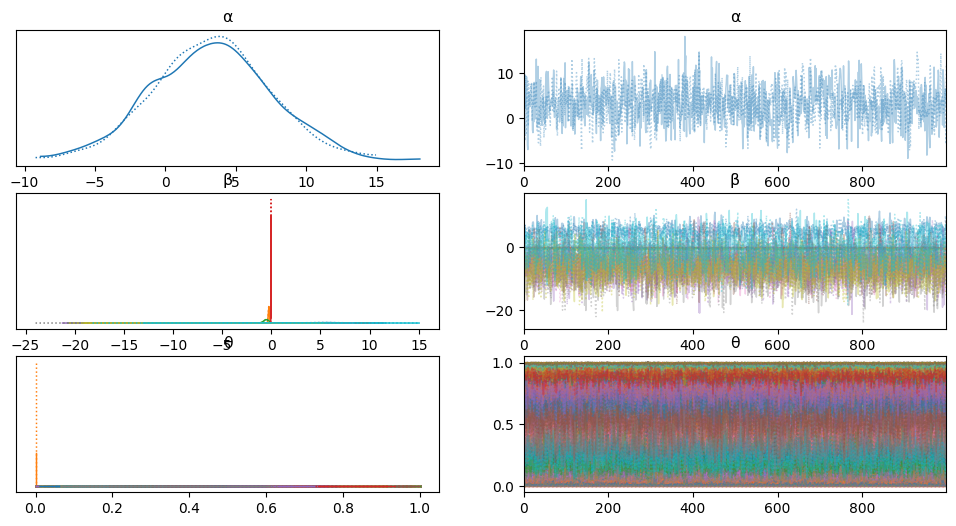

In [ ]:
az.plot_trace(trace_1)

In [ ]:
az.summary(trace_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,3.265,4.098,-3.902,11.622,0.122,0.089,1128.0,1242.0,1.0
β[0],5.155,1.751,1.874,8.353,0.058,0.041,931.0,1165.0,1.0
β[1],-0.258,0.053,-0.359,-0.164,0.001,0.001,2018.0,1436.0,1.0
β[2],-0.527,0.242,-0.977,-0.082,0.008,0.005,1052.0,1034.0,1.0
β[3],-0.030,0.008,-0.044,-0.016,0.000,0.000,1170.0,1115.0,1.0
...,...,...,...,...,...,...,...,...,...
θ[421],0.996,0.003,0.992,1.000,0.000,0.000,2022.0,1260.0,1.0
θ[422],0.990,0.006,0.980,0.998,0.000,0.000,1886.0,1418.0,1.0
θ[423],0.896,0.042,0.820,0.969,0.001,0.001,1886.0,1643.0,1.0
θ[424],0.000,0.000,0.000,0.001,0.000,0.000,1424.0,1466.0,1.0


/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (437) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β\n0'}>,
        <Axes: title={'center': 'β\n1'}>,
        <Axes: title={'center': 'β\n2'}>],
       [<Axes: title={'center': 'β\n3'}>,
        <Axes: title={'center': 'β\n4'}>,
        <Axes: title={'center': 'β\n5'}>,
        <Axes: title={'center': 'β\n6'}>],
       [<Axes: title={'center': 'β\n7'}>,
        <Axes: title={'center': 'β\n8'}>,
        <Axes: title={'center': 'β\n9'}>,
        <Axes: title={'center': 'θ\n0'}>],
       [<Axes: title={'center': 'θ\n1'}>,
        <Axes: title={'center': 'θ\n2'}>,
        <Axes: title={'center': 'θ\n3'}>,
        <Axes: title={'center': 'θ\n4'}>],
       [<Axes: title={'center': 'θ\n5'}>,
        <Axes: title={'center': 'θ\n6'}>,
        <Axes: title={'center': 'θ\n7'}>,
        <Axes: title={'center': 'θ\n8'}>],
       [<Axes: title={'center': 'θ\n9'}>,
        <Axes: title={'center': 'θ\n10'}>,
        <Axes: title={'center': 'θ\n11'}>,
        <Axes: title={'center': 'θ\n12

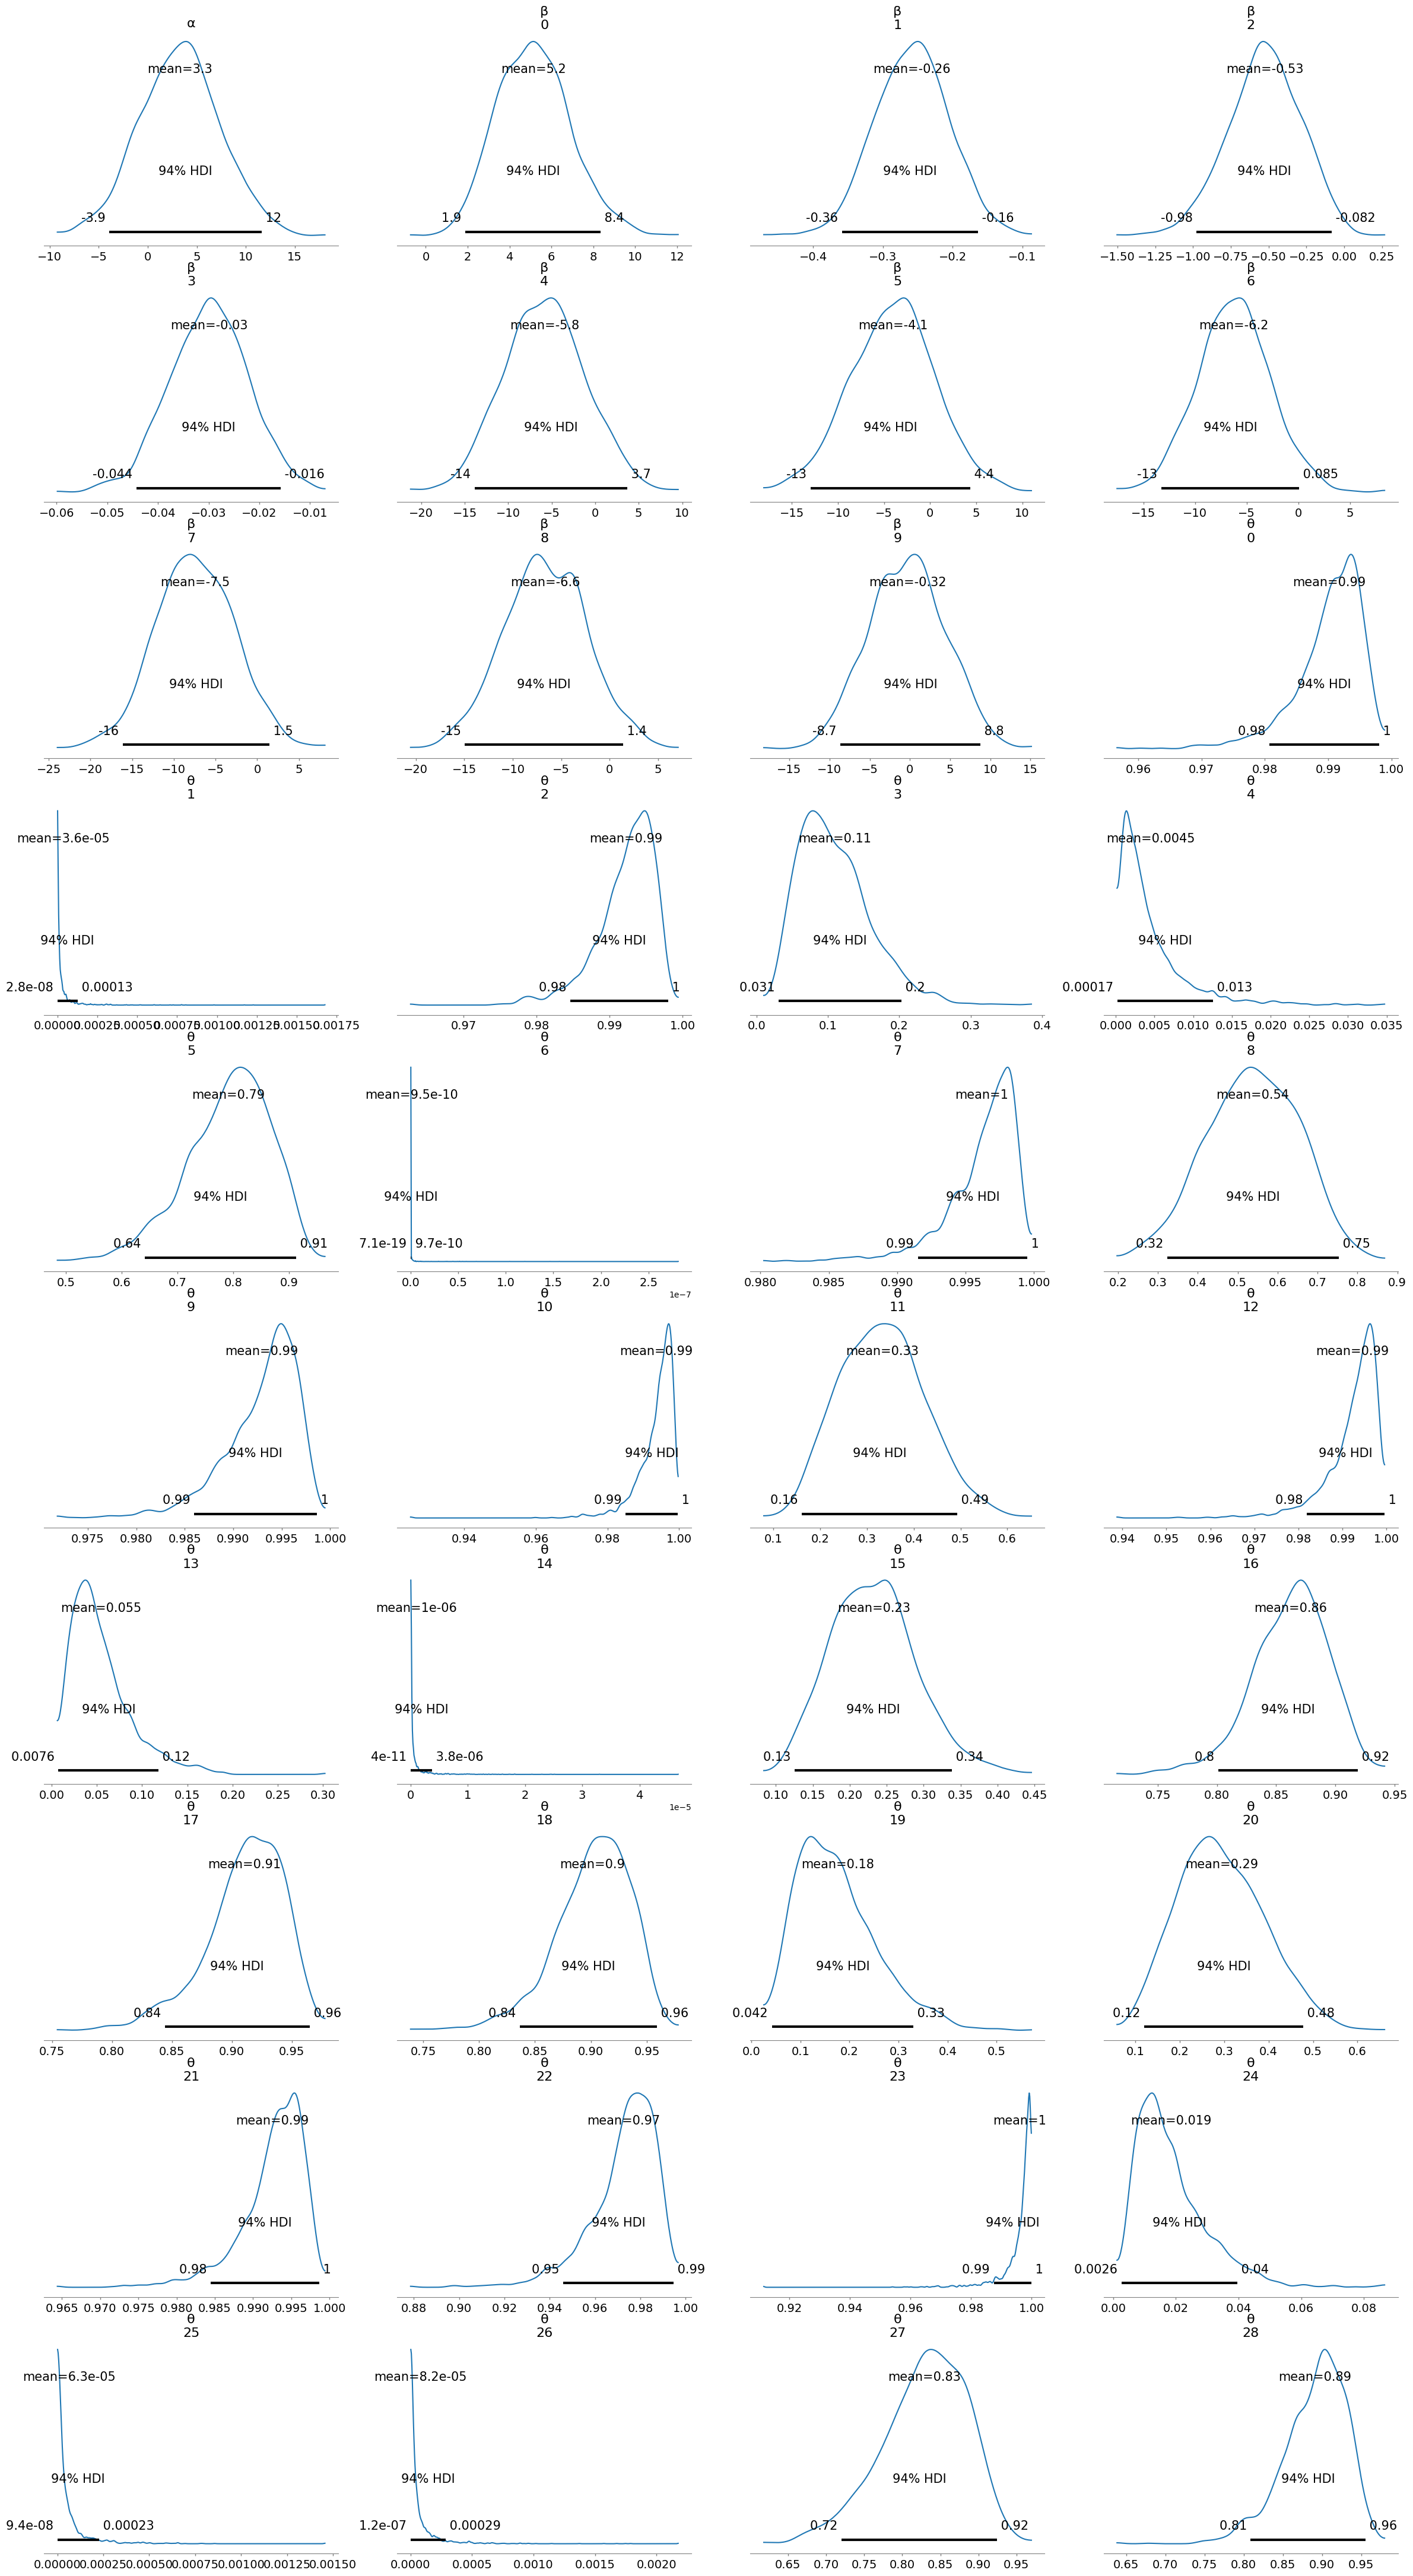

In [ ]:
az.plot_posterior(trace_1)

### Predictions on test data

In [ ]:
alpha_chain = trace_1.posterior['α'].mean(axis=0).values
beta_chain  = trace_1.posterior['β'].mean(axis=0).values

print(np.shape(alpha_chain), np.shape(beta_chain))

(1000,) (1000, 10)


In [ ]:
logit = np.dot(xv_test, beta_chain.T) + alpha_chain
print(np.shape(logit))

(143, 1000)


In [ ]:
probabilities = 1 / (1 + np.exp(-logit))
print(np.shape(probabilities))

(143, 1000)


In [ ]:
np.shape(yv_test)

(143,)

In [ ]:
# Average probabilities for prediction
mean_probabilities = np.mean(probabilities, axis=1)

# Class assignment (you might adjust the threshold if needed, default is 0.5)
class_assignments = (mean_probabilities > 0.5).astype(int)

# Uncertainty estimation
lower_bound = np.percentile(probabilities, 2.5, axis=1)
upper_bound = np.percentile(probabilities, 97.5, axis=1)

print("\n=======================================")
print("TEST DATA: \n", xv_test.T)
print("=======================================\n")
print("class, probabilities, ranges(94%HDI): ")
for g,h,i,j,k in zip(yv_test, class_assignments, mean_probabilities, lower_bound,upper_bound):
  print(f"ground-truth: {g}, class: {h}, mean prob. {i:.4f}, 94% HDI: [{j:.4f},{k:.4f}]")

print("=======================================\n")


TEST DATA: 
 [[1.125e+01 9.742e+00 1.754e+01 ... 2.055e+01 1.287e+01 2.321e+01]
 [1.478e+01 1.567e+01 1.932e+01 ... 2.086e+01 1.954e+01 2.697e+01]
 [7.138e+01 6.150e+01 1.151e+02 ... 1.378e+02 8.267e+01 1.535e+02]
 ...
 [2.941e-03 1.407e-02 7.488e-02 ... 1.322e-01 2.090e-02 1.237e-01]
 [1.773e-01 2.081e-01 1.506e-01 ... 2.127e-01 1.861e-01 1.909e-01]
 [6.081e-02 6.312e-02 5.491e-02 ... 6.251e-02 6.347e-02 6.309e-02]]

class, probabilities, ranges(94%HDI): 
ground-truth: 1, class: 1, mean prob. 0.9979, 94% HDI: [0.9954,0.9992]
ground-truth: 1, class: 1, mean prob. 0.9974, 94% HDI: [0.9937,0.9992]
ground-truth: 0, class: 0, mean prob. 0.0271, 94% HDI: [0.0095,0.0606]
ground-truth: 1, class: 1, mean prob. 0.9844, 94% HDI: [0.9722,0.9926]
ground-truth: 0, class: 0, mean prob. 0.0024, 94% HDI: [0.0004,0.0075]
ground-truth: 1, class: 1, mean prob. 0.6446, 94% HDI: [0.5177,0.7538]
ground-truth: 1, class: 1, mean prob. 0.9575, 94% HDI: [0.9341,0.9746]
ground-truth: 0, class: 1, mean prob. 0.9

In [ ]:
print(np.shape(yv_test), np.shape(class_assignments))
print(type(yv_test),type(class_assignments))

(143,) (143,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
%pip install scikit-learn


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate Accuracy
accuracy = accuracy_score(yv_test, class_assignments)
print(f"Accuracy: {accuracy}")

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(yv_test, class_assignments)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9370629370629371
Confusion Matrix:
[[46  8]
 [ 1 88]]


### Analysis on Training Data

In [ ]:
logit_train = np.dot(xv_train, beta_chain.T) + alpha_chain
print(np.shape(logit))

probabilities_train = 1 / (1 + np.exp(-logit_train))
print(np.shape(probabilities_train))


(143, 1000)
(426, 1000)


In [ ]:
# Average probabilities for prediction
mean_probabilities_train = np.mean(probabilities_train, axis=1)

# Class assignment (you might adjust the threshold if needed, default is 0.5)
class_assignments_train = (mean_probabilities_train > 0.5).astype(int)

# Uncertainty estimation
lower_bound_train = np.percentile(probabilities_train, 2.5, axis=1)
upper_bound_train = np.percentile(probabilities_train, 97.5, axis=1)

print("\n=======================================")
print("TRAINING DATA: \n", xv_train.T)
print("=======================================\n")

print("class, probabilities, ranges(94%HDI): ")
for g,h,i,j,k in zip(yv_train, class_assignments_train, mean_probabilities_train, lower_bound_train, upper_bound_train):
  print(f"ground-truth: {g}, class: {h}, mean prob. {i:.4f}, 94% HDI: [{j:.4f},{k:.4f}]")

print("=======================================\n")


TRAINING DATA: 
 [[1.154e+01 2.031e+01 1.136e+01 ... 1.205e+01 2.044e+01 1.174e+01]
 [1.444e+01 2.706e+01 1.757e+01 ... 2.272e+01 2.178e+01 1.469e+01]
 [7.465e+01 1.329e+02 7.249e+01 ... 7.875e+01 1.338e+02 7.631e+01]
 ...
 [2.594e-02 9.333e-02 2.100e-02 ... 2.978e-02 7.785e-02 2.639e-02]
 [1.818e-01 1.814e-01 1.601e-01 ... 1.203e-01 1.618e-01 1.499e-01]
 [6.782e-02 5.572e-02 5.913e-02 ... 6.659e-02 5.557e-02 6.758e-02]]

class, probabilities, ranges(94%HDI): 
ground-truth: 1, class: 1, mean prob. 0.9908, 94% HDI: [0.9824,0.9958]
ground-truth: 0, class: 0, mean prob. 0.0000, 94% HDI: [0.0000,0.0001]
ground-truth: 1, class: 1, mean prob. 0.9927, 94% HDI: [0.9865,0.9966]
ground-truth: 0, class: 0, mean prob. 0.1042, 94% HDI: [0.0483,0.1843]
ground-truth: 0, class: 0, mean prob. 0.0037, 94% HDI: [0.0008,0.0109]
ground-truth: 1, class: 1, mean prob. 0.7960, 94% HDI: [0.6794,0.8874]
ground-truth: 0, class: 0, mean prob. 0.0000, 94% HDI: [0.0000,0.0000]
ground-truth: 1, class: 1, mean prob.

In [ ]:
# Calculate Accuracy
accuracy_train = accuracy_score(yv_train, class_assignments_train)
print(f"Accuracy: {accuracy_train}")

# Calculate Confusion Matrix
conf_matrix_train = confusion_matrix(yv_train, class_assignments_train)
print(f"Confusion Matrix:\n{conf_matrix_train}")

Accuracy: 0.9154929577464789
Confusion Matrix:
[[135  23]
 [ 13 255]]


### Isolate the misidentified events

In [ ]:
# Find indices where the prediction and the ground truth don't match
mismatch_indices = np.where(yv_test != class_assignments)[0]


In [ ]:
# Select the mismatched events
mismatched_events_true = yv_test[mismatch_indices]
mismatched_events_class = class_assignments[mismatch_indices]
mismatched_events_prob = mean_probabilities[mismatch_indices]
mismatched_events_low = lower_bound[mismatch_indices]
mismatched_events_up = upper_bound[mismatch_indices]

In [ ]:
print("\n=======================================")
print("MISMATCHED TEST DATA: \n", xv_train.T)
print("=======================================\n")

print("class, probabilities, ranges(94%HDI): ")
for f,g,h,i,j,k in zip(mismatch_indices, mismatched_events_true, mismatched_events_class, mismatched_events_prob, \
                     mismatched_events_low, mismatched_events_up ):
  print(f"index: {f:4}, ground-truth: {g}, class: {h}, mean prob. {i:.4f}, 94% HDI: [{j:.4f},{k:.4f}]")

print("=======================================\n")


MISMATCHED TEST DATA: 
 [[1.154e+01 2.031e+01 1.136e+01 ... 1.205e+01 2.044e+01 1.174e+01]
 [1.444e+01 2.706e+01 1.757e+01 ... 2.272e+01 2.178e+01 1.469e+01]
 [7.465e+01 1.329e+02 7.249e+01 ... 7.875e+01 1.338e+02 7.631e+01]
 ...
 [2.594e-02 9.333e-02 2.100e-02 ... 2.978e-02 7.785e-02 2.639e-02]
 [1.818e-01 1.814e-01 1.601e-01 ... 1.203e-01 1.618e-01 1.499e-01]
 [6.782e-02 5.572e-02 5.913e-02 ... 6.659e-02 5.557e-02 6.758e-02]]

class, probabilities, ranges(94%HDI): 
index:    7, ground-truth: 0, class: 1, mean prob. 0.9876, 94% HDI: [0.9773,0.9938]
index:   21, ground-truth: 0, class: 1, mean prob. 0.9401, 94% HDI: [0.9092,0.9642]
index:   30, ground-truth: 0, class: 1, mean prob. 0.7574, 94% HDI: [0.6417,0.8530]
index:   40, ground-truth: 0, class: 1, mean prob. 0.5834, 94% HDI: [0.4833,0.6747]
index:   42, ground-truth: 0, class: 1, mean prob. 0.5778, 94% HDI: [0.4193,0.7278]
index:   72, ground-truth: 0, class: 1, mean prob. 0.6508, 94% HDI: [0.5463,0.7520]
index:   90, ground-tru

### Filtering those events

In [ ]:
uncertain_events = [40,42,120,133]
uncertain_events = np.asarray(uncertain_events)

In [ ]:
print(type(yv_test),np.shape(yv_test))

# Create a boolean mask
mask = np.ones(yv_test.shape, dtype=bool)  # Initialize mask with True
mask[uncertain_events] = False  # Set False for indices in mismatch_indices


# Filter the data
filtered_yv_test = yv_test[mask]
filtered_xv_test = xv_test[mask]
filtered_events_class = class_assignments[mask]
filtered_events_prob = mean_probabilities[mask]
filtered_events_low = lower_bound[mask]
filtered_events_up = upper_bound[mask]

<class 'numpy.ndarray'> (143,)


In [ ]:
# Calculate Accuracy
accuracy_filter = accuracy_score(filtered_yv_test, filtered_events_class)
print(f"Accuracy: {accuracy_filter}")

# Calculate Confusion Matrix
conf_matrix_filter = confusion_matrix(filtered_yv_test, filtered_events_class)
print(f"Confusion Matrix:\n{conf_matrix_train}")

Accuracy: 0.9640287769784173
Confusion Matrix:
[[135  23]
 [ 13 255]]


### Using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# PCA transformation
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [ ]:
print(pca.explained_variance_)
expl_var = pca.explained_variance_ratio_
print(expl_var)
print(x_train_scaled.var())

[5.40185459 2.6218337 ]
[0.53891742 0.26156792]
0.9999999999999998


In [ ]:
with pm.Model() as model_pca:

    alpha = pm.Normal('alpha', mu=0, sigma=5)
    betas = pm.Normal('betas', mu=0, sigma=5, shape= x_train_pca.shape[1])

    logits = alpha + pm.math.dot(x_train_pca, betas)


    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-logits)))
    bd = pm.Deterministic('bd', -alpha/betas[1] - betas[0]/betas[1] * x_train_pca[:,0])


    yl = pm.Bernoulli('yl', p=theta, observed=y_train)

    trace_pca = pm.sample(1000, tune=2000, return_inferencedata=True, target_accept=0.85)

In [ ]:
az.summary(trace_pca)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.563,0.212,0.161,0.951,0.005,0.004,1610.0,1432.0,1.0
betas[0],-2.489,0.297,-3.016,-1.901,0.008,0.006,1340.0,1294.0,1.0
betas[1],0.789,0.164,0.465,1.065,0.004,0.003,1385.0,1183.0,1.0
theta[0],0.989,0.006,0.977,0.998,0.000,0.000,1283.0,1044.0,1.0
theta[1],0.000,0.000,0.000,0.001,0.000,0.000,1243.0,1188.0,1.0
...,...,...,...,...,...,...,...,...,...
bd[421],-6.825,1.280,-9.212,-4.726,0.028,0.020,2044.0,1554.0,1.0
bd[422],-4.389,0.860,-5.972,-2.989,0.019,0.014,1913.0,1609.0,1.0
bd[423],-6.174,1.167,-8.342,-4.251,0.026,0.018,2027.0,1554.0,1.0
bd[424],6.131,1.126,4.311,8.212,0.023,0.016,2331.0,1667.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'bd'}>, <Axes: title={'center': 'bd'}>]],
      dtype=object)

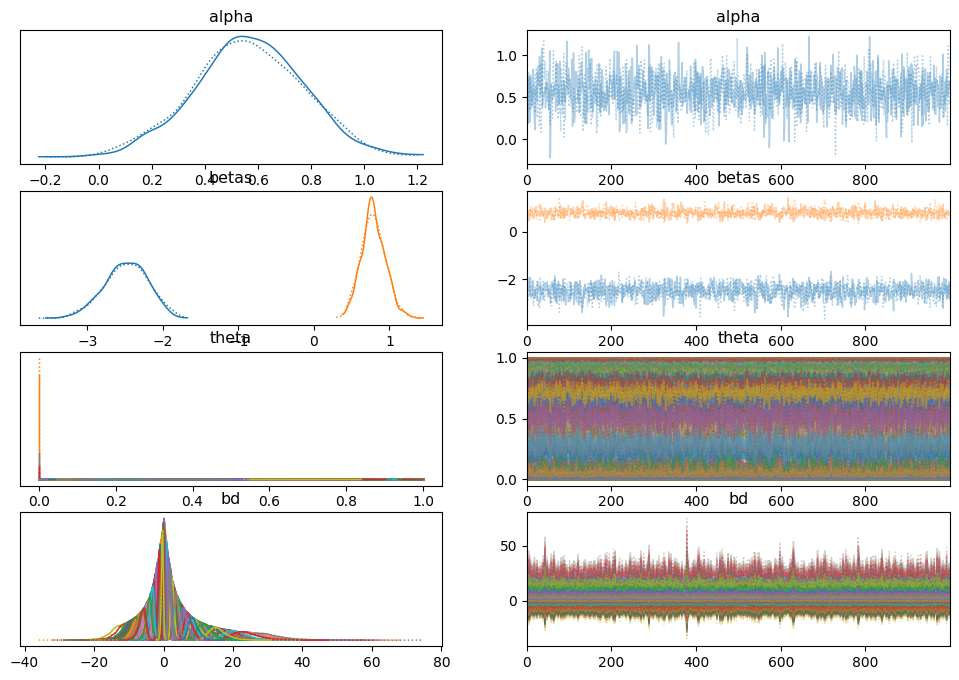

In [ ]:
az.plot_trace(trace_pca)

In [ ]:
alpha_chain_pca = trace_pca.posterior['alpha'].mean(axis=0).values
betas_chain_pca = trace_pca.posterior['betas'].mean(axis=0).values

print(np.shape(alpha_chain_pca), np.shape(betas_chain_pca))

(1000,) (1000, 2)


### Analysis on standardized and PCA-reduced data

In [ ]:
logit_pca = np.dot(x_test_pca, betas_chain_pca.T) + alpha_chain_pca
print(np.shape(logit_pca))

probabilities_pca = 1 / (1 + np.exp(-logit_pca))
print(np.shape(probabilities_pca))

(143, 1000)
(143, 1000)


In [ ]:
# Average probabilities for prediction
mean_probabilities_pca = np.mean(probabilities_pca, axis=1)

# Class assignment (you might adjust the threshold if needed, default is 0.5)
class_assignments_pca = (mean_probabilities_pca > 0.5).astype(int)

# Uncertainty estimation
lower_bound_pca = np.percentile(probabilities_pca, 2.5, axis=1)
upper_bound_pca = np.percentile(probabilities_pca, 97.5, axis=1)

print("\n=======================================")
print("TEST DATA (after stanardization and PCA-reduced): \n", x_test_pca.T)
print("=======================================\n")

print("class, probabilities, ranges(94%HDI): ")
count = 0
for g,h,i,j,k in zip(yv_test, class_assignments_pca, mean_probabilities_pca, lower_bound_pca, upper_bound_pca):
  if (count%20==0):
    print(f"ground-truth: {g}, class: {h}, mean prob. {i:.4f}, 94% HDI: [{j:.4f},{k:.4f}]")
  count = count+1

print("=======================================\n")


TEST DATA (after stanardization and PCA-reduced): 
 [[-2.68765349 -2.5113037   1.01084219 -2.83111171  2.16544047  0.37694912
  -0.91817304 -1.68999278 -1.24530946  0.12623048 -2.38243235  1.90388123
   2.31888898 -2.27683002  2.83808936 -1.03028813 -2.29880578 -1.89687777
  -0.52039147 -1.30806695  4.36476664 -1.20633777 -1.33057932 -2.81543489
  -2.09760325  1.34545564  1.2317508  -1.91466512  0.44382841 -2.43543411
   1.28886213 -2.03699266 -1.28565306 -1.87007999  1.38979878 -2.2149903
  -0.99558582 -1.9069201  -2.10892453  2.78043943 -0.59618023 -1.71318561
   1.40232197 -0.59737643  0.8066522   0.17532421  4.02489799  7.51919622
   0.41079628  0.56903517  0.9351951   2.51774498 -0.71395051 -1.75754436
  -1.46500693  1.91261772 -1.52280955  3.52478866  4.13148745 -0.05593647
   4.92138927 -1.99454432 -1.10275494 -2.68566393 -0.73253818  7.77540963
  -2.67319268 -2.42506682 -1.12459722  0.43761454 -2.13246376 -2.04942915
  -0.39346898 -1.73509426 -0.01507782 -1.28842198 -0.5076413

In [ ]:
# Calculate Accuracy
accuracy_pca = accuracy_score(yv_test, class_assignments_pca)
print(f"Accuracy: {accuracy_pca}")

# Calculate Confusion Matrix
conf_matrix_pca = confusion_matrix(yv_test, class_assignments_pca)
print(f"Confusion Matrix:\n{conf_matrix_pca}")

Accuracy: 0.951048951048951
Confusion Matrix:
[[48  6]
 [ 1 88]]


### Visualization of Uncertainty Band

Text(0.5, 1.0, 'training data')

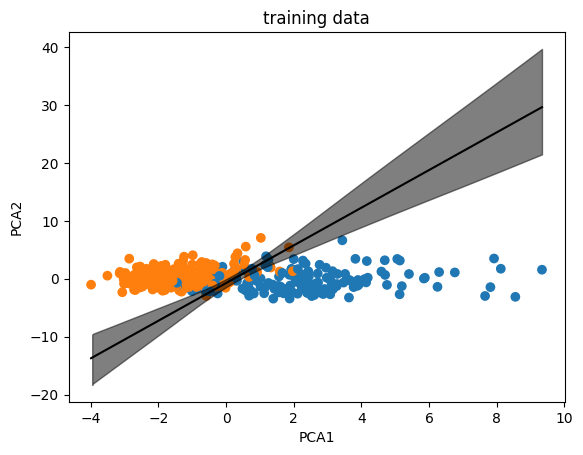

In [ ]:
import matplotlib.pyplot as plt


idx = np.argsort(x_train_pca[:,0])


bd_mean = trace_pca.posterior['bd'].mean(axis=0).mean(axis=0)


plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=[f'C{x}' for x in yv_train])

bd = bd_mean[idx]

plt.plot(x_train_pca[:,0][idx], bd, color='k');


az.plot_hdi(x_train_pca[:,0], trace_pca.posterior['bd'], color='k')


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('training data')

Text(0.5, 1.0, 'Test Data')

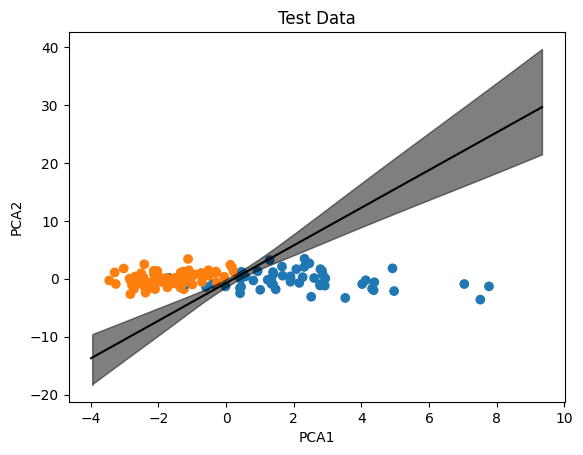

In [ ]:
bd_mean = trace_pca.posterior['bd'].mean(axis=0).mean(axis=0)


plt.scatter(x_test_pca[:,0], x_test_pca[:,1], c=[f'C{x}' for x in yv_test])

bd = bd_mean[idx]

plt.plot(x_train_pca[:,0][idx], bd, color='k');


az.plot_hdi(x_train_pca[:,0], trace_pca.posterior['bd'], color='k')


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Test Data')

### Filtering Events

In [ ]:
# Find indices where the prediction and the ground truth don't match
mismatch_indices = np.where(yv_test != class_assignments_pca)[0]
print(mismatch_indices)

[  5   7  21  40  72  90 133]


In [ ]:
# Select the mismatched events
mismatched_events_true_pca = yv_test[mismatch_indices]
mismatched_events_class_pca = class_assignments_pca[mismatch_indices]
mismatched_events_prob_pca = mean_probabilities_pca[mismatch_indices]
mismatched_events_low_pca = lower_bound_pca[mismatch_indices]
mismatched_events_up_pca = upper_bound_pca[mismatch_indices]

In [ ]:
print("\n=======================================")
print("MISMATCHED TEST DATA (after PCA): \n", xv_train.T)
print("=======================================\n")

print("class, probabilities, ranges(94%HDI): ")
for f,g,h,i,j,k in zip(mismatch_indices, mismatched_events_true_pca, mismatched_events_class_pca, mismatched_events_prob_pca, \
                     mismatched_events_low_pca, mismatched_events_up_pca ):
  print(f"index: {f:4}, ground-truth: {g}, class: {h}, mean prob. {i:.4f}, 94% HDI: [{j:.4f},{k:.4f}]")

print("=======================================\n")


MISMATCHED TEST DATA (after PCA): 
 [[1.154e+01 2.031e+01 1.136e+01 ... 1.205e+01 2.044e+01 1.174e+01]
 [1.444e+01 2.706e+01 1.757e+01 ... 2.272e+01 2.178e+01 1.469e+01]
 [7.465e+01 1.329e+02 7.249e+01 ... 7.875e+01 1.338e+02 7.631e+01]
 ...
 [2.594e-02 9.333e-02 2.100e-02 ... 2.978e-02 7.785e-02 2.639e-02]
 [1.818e-01 1.814e-01 1.601e-01 ... 1.203e-01 1.618e-01 1.499e-01]
 [6.782e-02 5.572e-02 5.913e-02 ... 6.659e-02 5.557e-02 6.758e-02]]

class, probabilities, ranges(94%HDI): 
index:    5, ground-truth: 1, class: 0, mean prob. 0.4813, 94% HDI: [0.4014,0.5575]
index:    7, ground-truth: 0, class: 1, mean prob. 0.9920, 94% HDI: [0.9847,0.9968]
index:   21, ground-truth: 0, class: 1, mean prob. 0.9407, 94% HDI: [0.9093,0.9652]
index:   40, ground-truth: 0, class: 1, mean prob. 0.7147, 94% HDI: [0.6275,0.7923]
index:   72, ground-truth: 0, class: 1, mean prob. 0.6937, 94% HDI: [0.6163,0.7643]
index:   90, ground-truth: 0, class: 1, mean prob. 0.5914, 94% HDI: [0.5029,0.6751]
index:  133

In [ ]:
uncertain_events_pca = [5,133]
uncertain_events_pca = np.asarray(uncertain_events_pca)

In [ ]:
print(type(yv_test),np.shape(yv_test))

# Create a boolean mask
mask_pca = np.ones(yv_test.shape, dtype=bool)  # Initialize mask with True
mask_pca[uncertain_events_pca] = False  # Set False for indices in mismatch_indices


# Filter the data
filtered_yv_test_pca = yv_test[mask_pca]
filtered_xv_test_pca = x_test_pca.values[mask_pca]
filtered_events_class_pca = class_assignments_pca[mask_pca]
filtered_events_prob_pca = mean_probabilities_pca[mask_pca]
filtered_events_low_pca = lower_bound_pca[mask_pca]
filtered_events_up_pca = upper_bound_pca[mask_pca]

<class 'numpy.ndarray'> (143,)


In [ ]:
Ple# Calculate Accuracy
accuracy_pca_filter = accuracy_score(filtered_yv_test_pca, filtered_events_class_pca)
print(f"Accuracy: {accuracy_pca_filter}")

# Calculate Confusion Matrix
conf_matrix_pca_filter = confusion_matrix(filtered_yv_test_pca, filtered_events_class_pca)
print(f"Confusion Matrix:\n{conf_matrix_pca}")

Accuracy: 0.9645390070921985
Confusion Matrix:
[[48  6]
 [ 1 88]]
